In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#setting pandas options(maximum coloumns options)
pd.set_option('display.max_columns', 17)

In [576]:
df = pd.read_csv(r'C:\Users\Shruthika\OneDrive\Documents\sem 7\Unified projects\customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22/03/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01/06/2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22/05/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01/06/2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14/07/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01/06/2023 11:14,01/06/2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13/11/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01/06/2023 7:29,01/06/2023 1:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04/02/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01/06/2023 0:12,01/06/2023 19:53,1.0


In [578]:
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(0)

In [580]:
df.shape

(8469, 17)

In [582]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating       0
dtype: int64

In [584]:
df.duplicated().sum()

0

In [586]:
#To check the columns with more than 50% null values

null_percentage = df.isnull().mean()  # Calculate percentage of null values in each column
columns_above_threshold = null_percentage[null_percentage > 0.5].index.tolist()

print(f"Columns with more than 50% null values: {columns_above_threshold}")

Columns with more than 50% null values: ['Resolution', 'Time to Resolution']


In [588]:
#Deleting the columns with more than 50% null values
df.drop(['Resolution', 'Time to Resolution'], axis=1, inplace=True)

In [590]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22/03/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,01/06/2023 12:15,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22/05/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,01/06/2023 16:45,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14/07/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,01/06/2023 11:14,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13/11/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,01/06/2023 7:29,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04/02/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,01/06/2023 0:12,1.0


In [592]:
#Filling the null values in the FIRST RESPONSE TIME column

df['First Response Time'].fillna(method='ffill', inplace=True)  # Forward fill

In [594]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22/03/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Social media,01/06/2023 12:15,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22/05/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Critical,Chat,01/06/2023 16:45,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14/07/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,01/06/2023 11:14,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13/11/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,01/06/2023 7:29,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04/02/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,01/06/2023 0:12,1.0


Text(0.5, 1.0, 'Customer Gender')

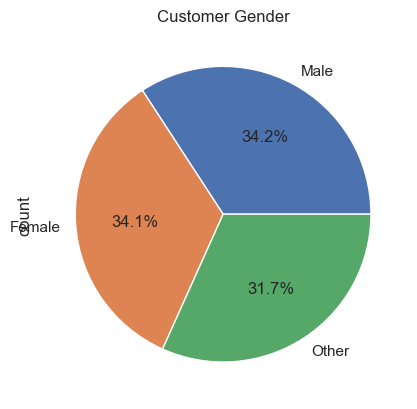

In [596]:
#Customers based on their Gender

df['Customer Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Gender')
#plt.show()

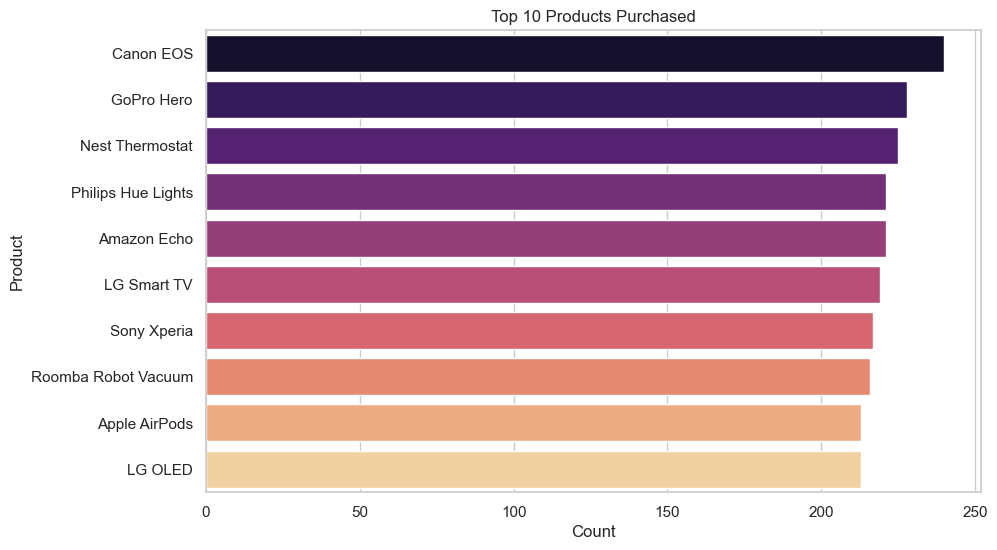

In [598]:
#Product Purchased Distribution

plt.figure(figsize=(10, 6))
product_purchased_distribution = df['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()


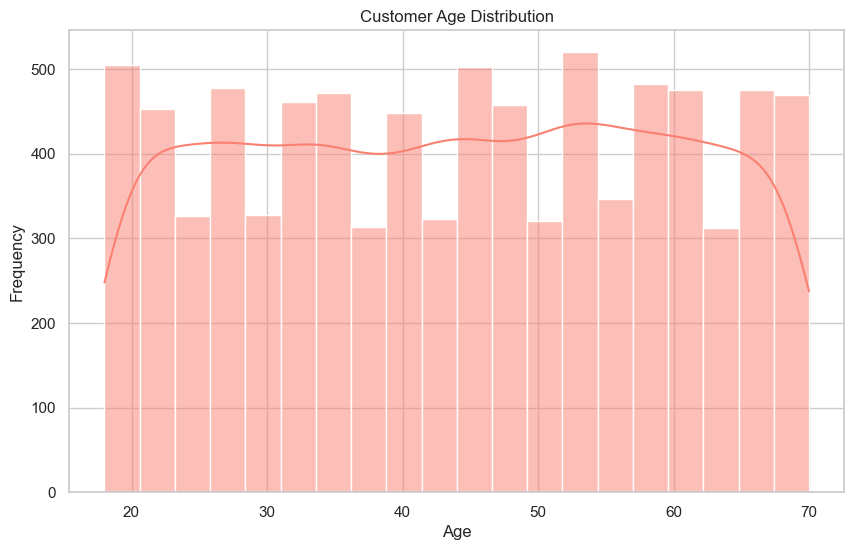

In [600]:
#Customer Age DIstribution in chart
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True,
color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

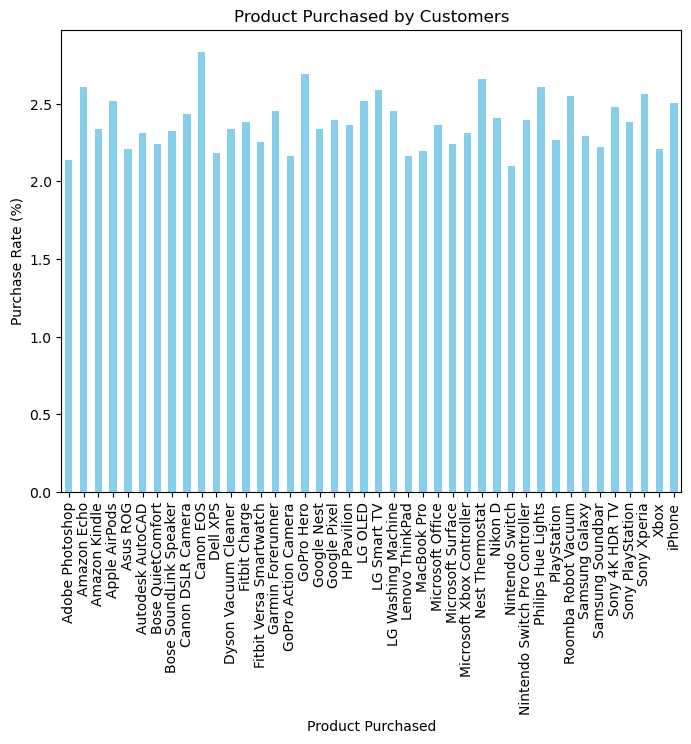

In [337]:
#Prodcuts purchased by customers

Product_Purchased = df.groupby(['Product Purchased']).size()

# Calculate percentages
Product_Purchased_pct = (Product_Purchased / Product_Purchased.sum()) * 100

# Plot the data
plt.figure(figsize=(8, 6))
Product_Purchased_pct.plot(kind='bar', color='skyblue')
plt.title('Product Purchased by Customers')
plt.ylabel('Purchase Rate (%)')
plt.xlabel('Product Purchased')
plt.show()

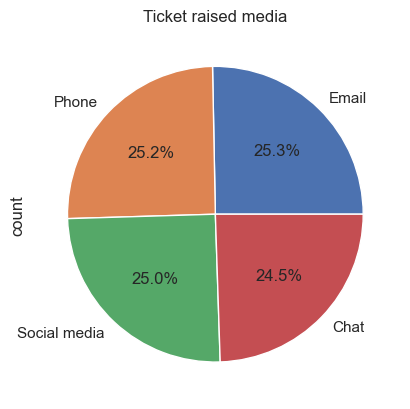

In [602]:
df['Ticket Channel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Ticket raised media')
plt.show()

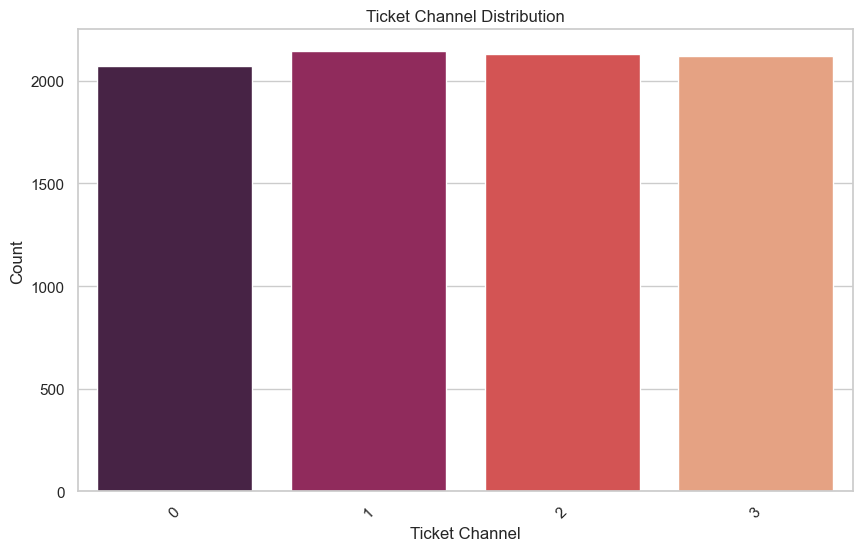

In [604]:
#Ticket Channel Distribution

plt.figure(figsize=(10, 6))
ticket_channel_distribution = data['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,
y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

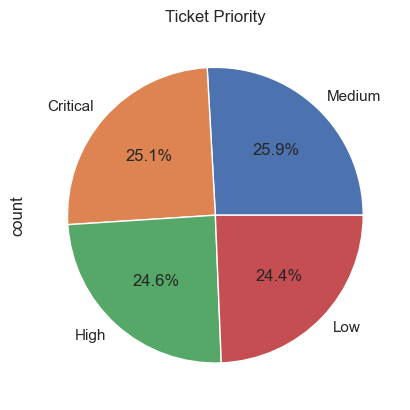

In [606]:
#Ticket priority


df['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Ticket Priority')
plt.show()

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


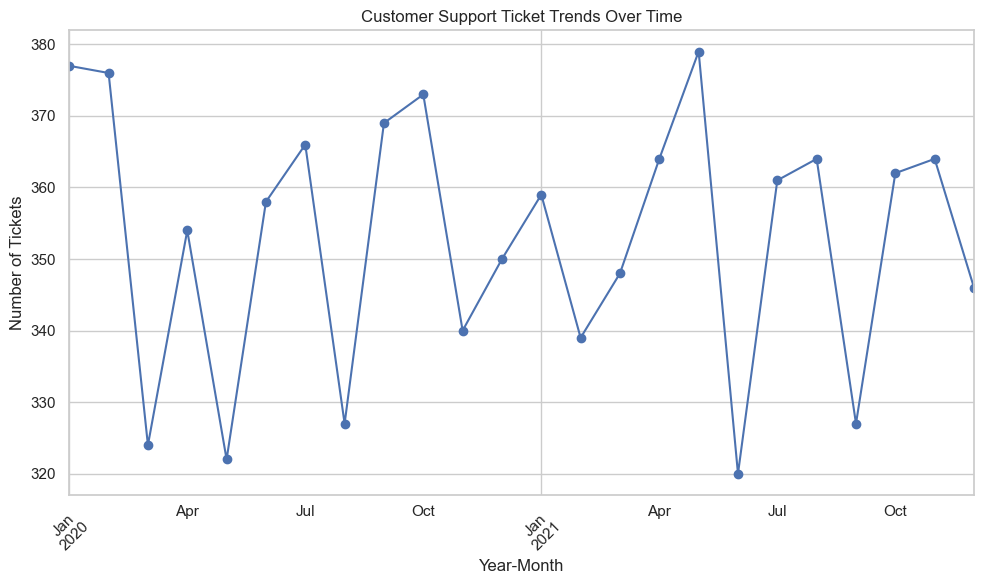

In [610]:
#Customer Support TIcket trends over time

common_issues = df['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
# Plotting ticket trends over time
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['YearMonth'] = df['Date of Purchase'].dt.to_period('M')
ticket_trends = df.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [622]:
ticket_type_segmentation = df.groupby('Ticket Type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)
# Segment based on satisfaction levels
satisfaction_segmentation = df.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)


Segmentation based on Ticket Types:
Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64

Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
0.0    5700
1.0     553
2.0     549
3.0     580
4.0     543
5.0     544
dtype: int64


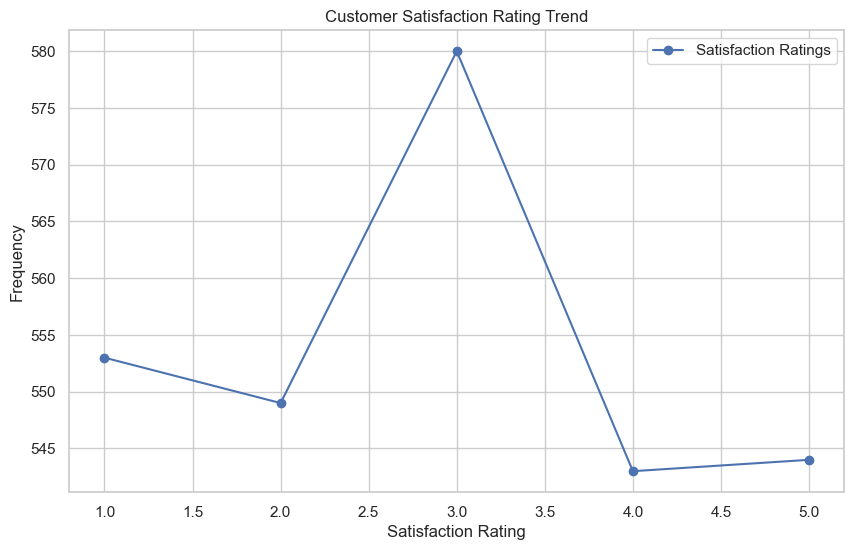

In [644]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
# plt.title('Customer Satisfaction Distribution')
# plt.xlabel('Satisfaction Rating')
# plt.ylabel('Frequency')
# plt.show()


# Aggregate data
rating_counts = filtered_df['Customer Satisfaction Rating'].value_counts().sort_index()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
plt.plot(rating_counts.index, rating_counts.values, marker='o', color='b', label='Satisfaction Ratings')
plt.title('Customer Satisfaction Rating Trend')
plt.xlabel('Satisfaction Rating')
#plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


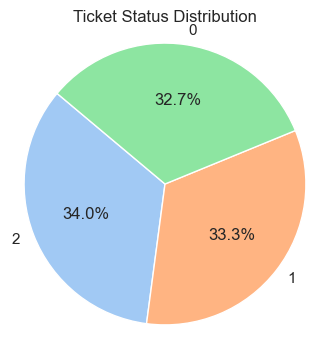

In [646]:
#Ticket Status Distribution

ticket_status_distribution = data['Ticket Status'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

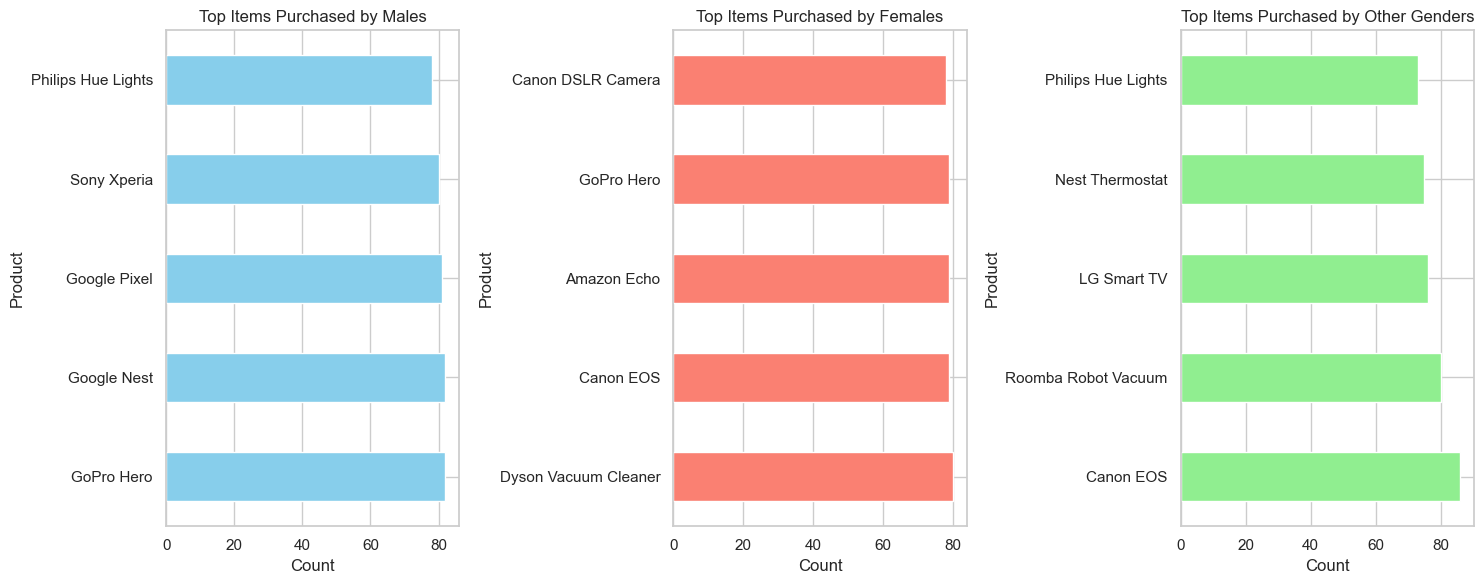

In [520]:
# Top Items Purchased by Gender (Horizontal Bar Chart)


plt.figure(figsize=(15, 6))
# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = df[df['Customer Gender'] == 'Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = df[df['Customer Gender'] == 'Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = df[df['Customer Gender'] == 'Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

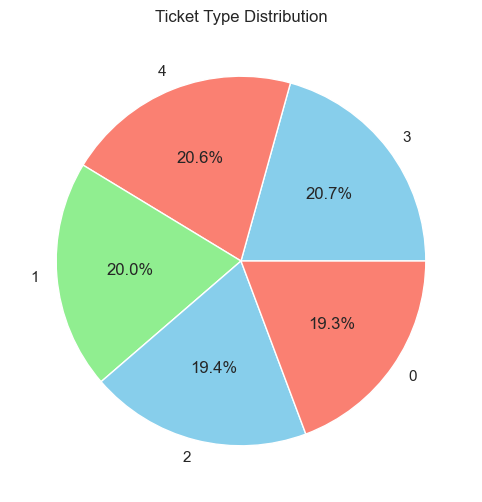

In [518]:
# Count ticket types

ticket_type_distribution = data['Ticket Type'].value_counts()

plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

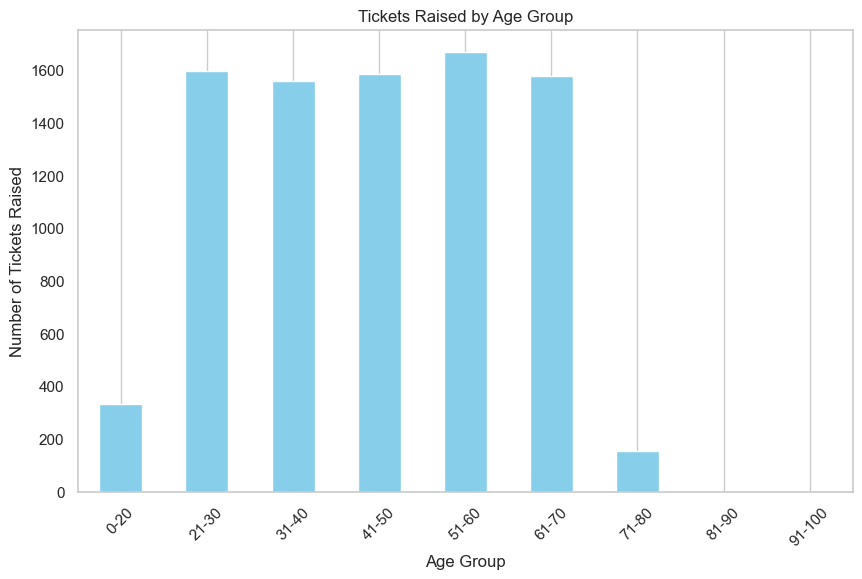

In [522]:
#Tickets raised by differnt age groups

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70',
'71-80', '81-90', '91-100']
# Categorize customers into age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)
# Calculate number of tickets raised by each age group
tickets_by_age_group = df.groupby('Age Group').size()
# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

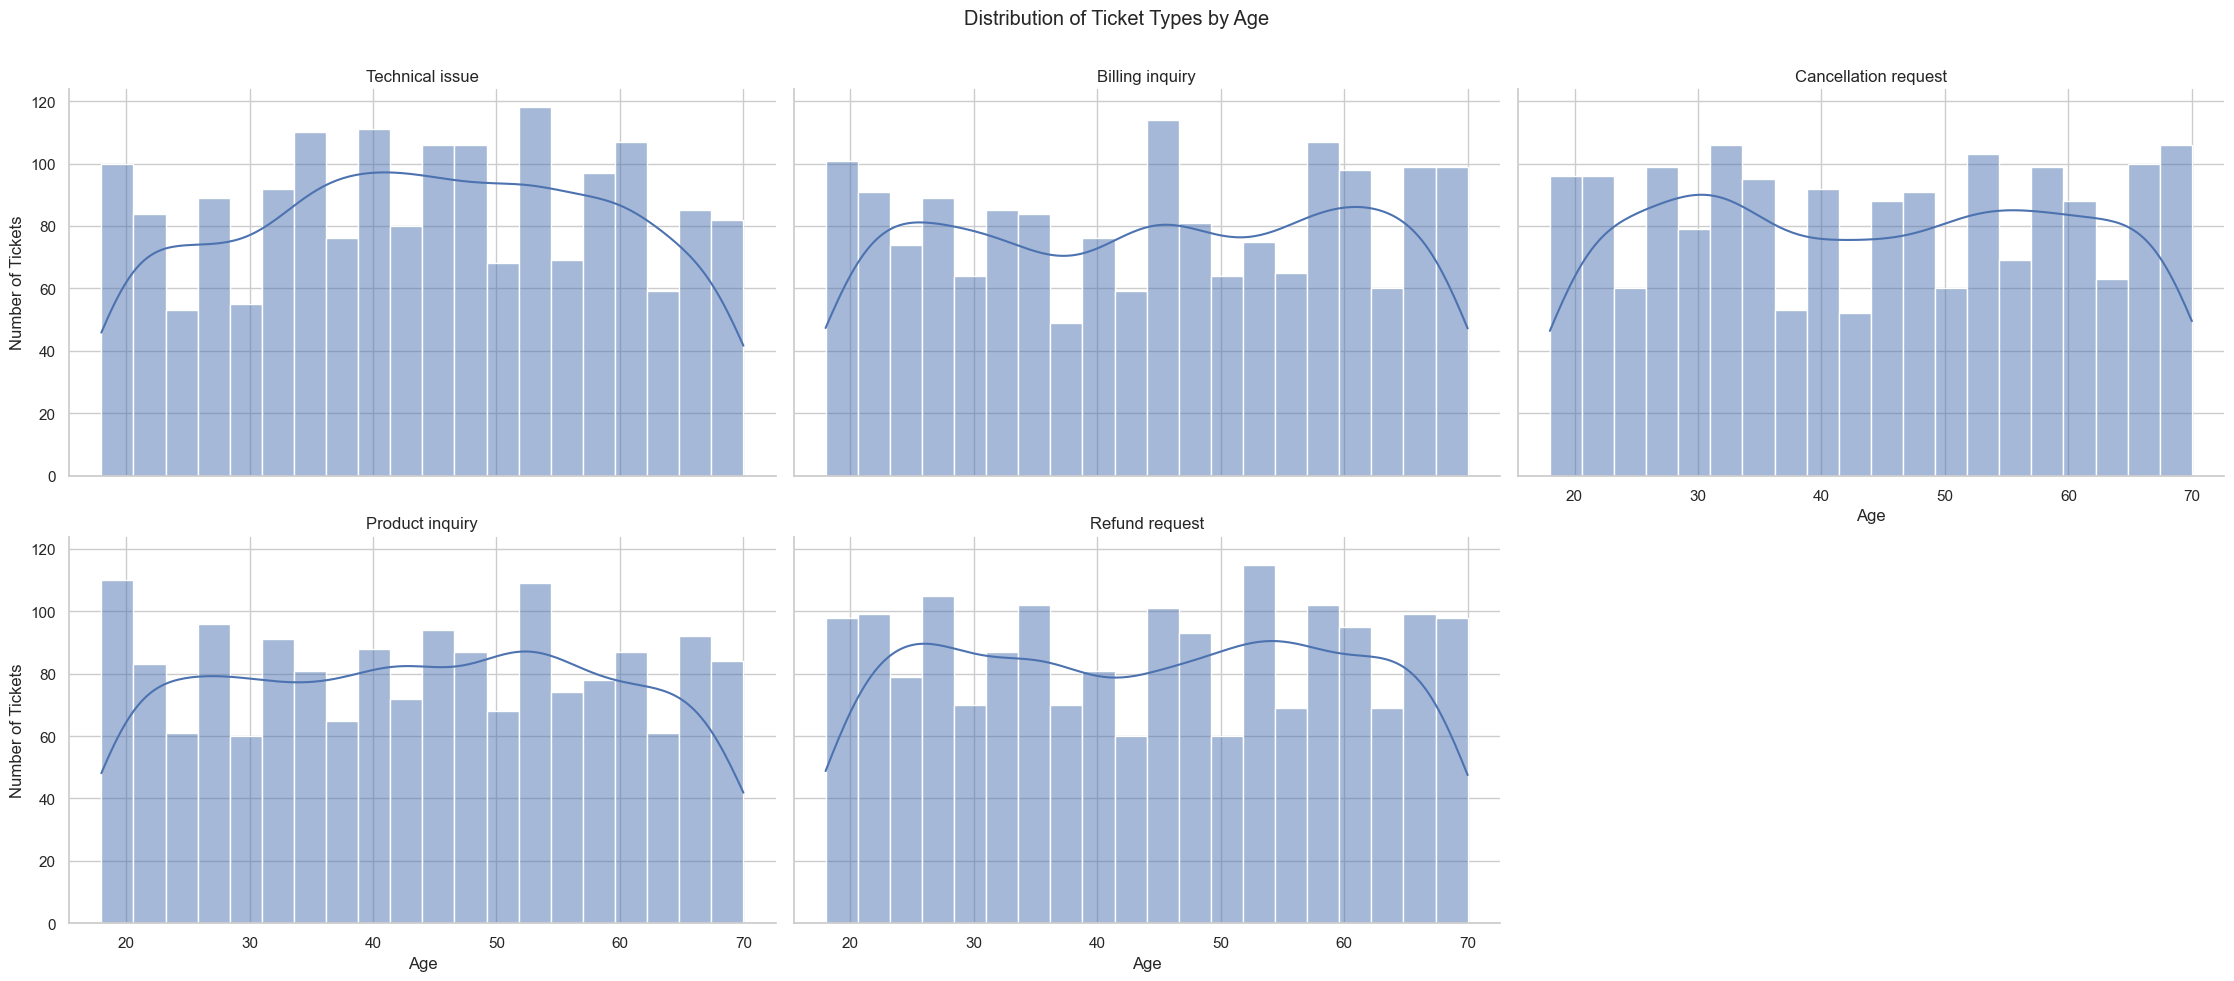

In [526]:
g = sns.FacetGrid(df, col='Ticket Type', col_wrap=3, height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
# Show plot
plt.show()

In [273]:
df.dtypes

Ticket ID               int64
Customer Name          object
Customer Email         object
Customer Age            int64
Customer Gender        object
Product Purchased      object
Date of Purchase       object
Ticket Type            object
Ticket Subject         object
Ticket Description     object
Ticket Status          object
Ticket Priority        object
Ticket Channel         object
First Response Time    object
dtype: object

Data Processing


1) Feature Selection

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# columns_to_drop = ['CustomerID', 'Overall Satisfaction']

# # Check existing columns
# print("Columns in DataFrame before dropping:", df.columns.tolist())

# # Drop columns if they exist
# df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# # Check the cleaned DataFrame
# print(f"Cleaned DataFrame shape: {df_cleaned.shape}")
# print("Columns in DataFrame after dropping:", df_cleaned.columns.tolist())

2) Categorical Conversion (to make categorical data interpretable for machine learning algorithms)

In [255]:
data = pd.DataFrame(df)

In [360]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

df = pd.DataFrame(data)
df.dtypes

Ticket ID              int64
Customer Name          int32
Customer Email         int32
Customer Age           int64
Customer Gender        int32
Product Purchased      int32
Date of Purchase       int32
Ticket Type            int32
Ticket Subject         int32
Ticket Description     int32
Ticket Status          int32
Ticket Priority        int32
Ticket Channel         int32
First Response Time    int32
dtype: object

In [362]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time
0,1,5058,1084,32,2,16,509,4,13,3369,2,0,3,193
1,2,3526,1334,42,0,21,513,4,10,2004,2,0,0,455
2,3,1510,2580,48,2,10,324,4,8,189,0,2,3,133
3,4,1400,741,27,0,25,308,0,0,1971,0,2,3,1250
4,5,103,740,67,0,5,74,0,3,636,0,2,1,12


ML model testing

In [364]:
X = data.drop(['Ticket ID', 'Ticket Type'], axis=1)
y = data['Ticket Type']
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [366]:
#Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
# Predict on the test set
y_pred = rfc.predict(X_test)

In [396]:
#Evaluation of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.20070838252656434
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.15      0.16       528
           1       0.21      0.25      0.23       488
           2       0.20      0.18      0.19       481
           3       0.19      0.21      0.20       520
           4       0.22      0.22      0.22       524

    accuracy                           0.20      2541
   macro avg       0.20      0.20      0.20      2541
weighted avg       0.20      0.20      0.20      2541

Confusion Matrix:
 [[ 78 131  89 121 109]
 [ 73 123  77 125  90]
 [ 90  91  86 105 109]
 [ 97 129  83 107 104]
 [ 88 125  90 105 116]]


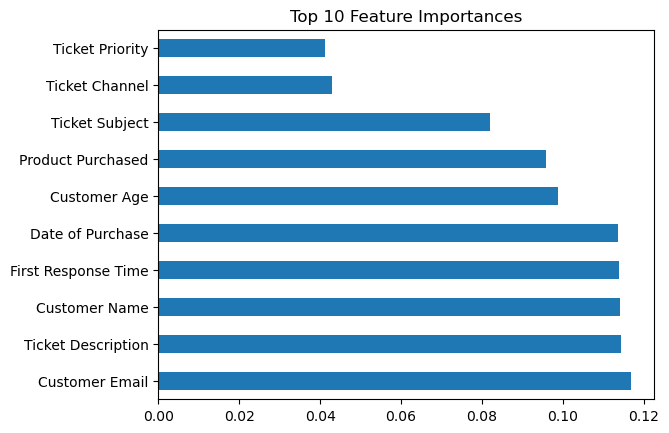

In [398]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

Top 10 Common Issues:
Ticket Subject
14    576
15    574
11    567
4     561
6     547
1     542
8     539
7     530
13    529
9     526
Name: count, dtype: int64


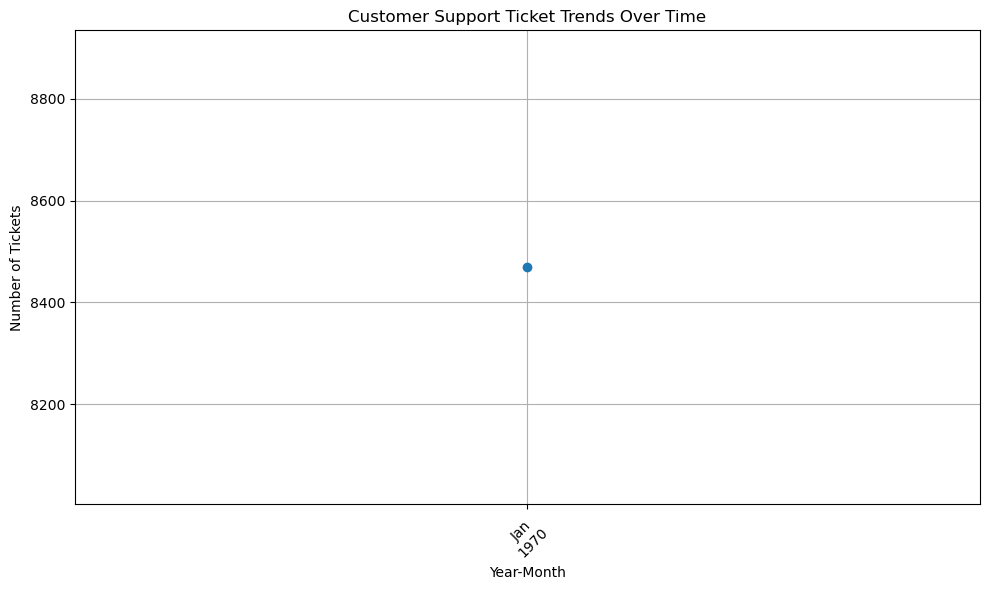

In [402]:
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
# Plotting ticket trends over time
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()